<a href="https://colab.research.google.com/github/RealMyeong/NLP_kaggle_transcription/blob/main/Tackling_Toxic_Transcription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Toxic Comment Classifiaction Challenge

위키피디아 댓글에대해 사람들이 직접 라벨링을 한 악성댓글 분류 문제입니다.

분류한 클래스는 아래와 같습니다.
- toxic
- severe_toxic
- obscene
- threat
- insult
- identity_hate

댓글을 보고 어떤 클래스인지 확률을 예측하는 문제입니다.



In [1]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [2]:
# Load data
train = pd.read_csv('/content/drive/MyDrive/AIFFEL/NLP_캐글필사/Tackling_Toxic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/AIFFEL/NLP_캐글필사/Tackling_Toxic/test.csv')

In [3]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [5]:
train.isnull().any(), test.isnull().any()

(id               False
 comment_text     False
 toxic            False
 severe_toxic     False
 obscene          False
 threat           False
 insult           False
 identity_hate    False
 dtype: bool, id              False
 comment_text    False
 dtype: bool)

In [6]:
list_classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
y = train[list_classes].values
list_sentences_train = train['comment_text']
list_sentences_test = test['comment_text']

In [7]:
# 토큰화 and 인덱싱
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

In [8]:
list_tokenized_train[1]

[52,
 2635,
 13,
 555,
 3809,
 73,
 4556,
 2706,
 21,
 94,
 38,
 803,
 2679,
 992,
 589,
 8377,
 182]

In [9]:
maxlen = 200
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [10]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]

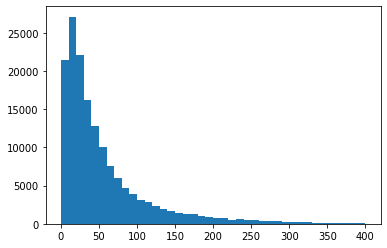

In [11]:
plt.hist(totalNumWords, bins=np.arange(0,410,10))
plt.show()

In [12]:
# 아직 임베딩을 어떻게 할지 안정했기 때문에 일단은 인풋으로 패딩된 길이가 들어간다고 해줌
# (None, 200)
inp = Input(shape=(maxlen,))

In [13]:
embed_size = 128
# (None, 200, 128)
x = Embedding(max_features, embed_size)(inp)

In [14]:
# (None, 200, 60)
x = LSTM(60, return_sequences=True, name='lstm_layer')(x)

In [15]:
x = GlobalMaxPool1D()(x)

In [16]:
x = Dropout(0.1)(x)

In [17]:
x = Dense(50, activation='relu')(x)

In [18]:
x = Dropout(0.1)(x)

In [19]:
x = Dense(6, activation='sigmoid')(x)

In [20]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
batch_size = 32
epochs = 2
model.fit(X_t, y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/2
4488/4488 [==============================] - 750s 167ms/step - loss: 0.0707 - accuracy: 0.9529 - val_loss: 0.0495 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 763s 170ms/step - loss: 0.0460 - accuracy: 0.9909 - val_loss: 0.0471 - val_accuracy: 0.9940


In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 128)          2560000   
                                                                 
 lstm_layer (LSTM)           (None, 200, 60)           45360     
                                                                 
 global_max_pooling1d (Globa  (None, 60)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 50)                3050      
                                                             